## Logistic Regression

In [9]:
import numpy as np
def sigmoid(x):
  # Activation function used to map any real value between 0 and 1
  return 1/(1+np.exp(-x))
def net_input(theta, x):
  # Computes the weighted sum of inputs
  net = None
  return np.dot(x,theta)

def predict_prob(theta, x):
  # Returns the probability after passing it through sigmoid "Y_hat"
	# predicted_probs = None
  return sigmoid(net_input(theta,x))

def fit(x, y):
    L = 0.001  # The learning Rate
    epochs = 200000  # The number of iterations to perform gradient descent
    m=x.shape[0]
    theta = np.zeros((x.shape[1],1))
    predicted_probs=predict_prob(theta,x)
    for i in range(epochs):
      dj_dw= (1/m) * np.dot(x.T,predict_prob(theta,x)-y)
      theta=theta-L*dj_dw
    return theta

def predict_classes(theta,x):
    return (predict_prob(theta,x) >= 0.5).astype(int)


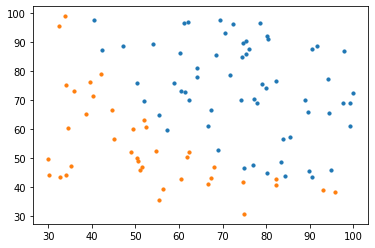

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


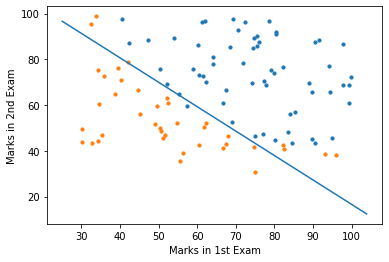

91.91919191919192


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('marks.csv')
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[Y == 1]
# filter out the applicants that din't get admission
not_admitted = data.loc[Y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.show()

#prepare data to be fitted
X = np.c_[np.ones((X.shape[0], 1)), X]

Y = Y[:, np.newaxis]
theta = fit(X, Y)

#plot decision boundary
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
theta = theta.flatten()
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.show()

actual_classes = Y.flatten()
predicted_classes = predict_classes(theta,X)
predicted_classes = predicted_classes.flatten()
accuracy = np.mean(predicted_classes == actual_classes)
print(accuracy * 100)

